# Visualization: Trading Session

In [1]:
import pandas as pd
import numpy as np

import altair as alt
import seaborn as sns
import tensorflow
import keras

### 1. Define parameters and Load model

In [2]:
from trading_bot.agent import Agent

model_name = 'model_debug_2_0.5.2'
test_stock = 'data/small_val_mod2.1.csv'
window_size = 10
debug = True

agent = Agent(window_size, pretrained=True, model_name=model_name)

### 2. Load test data

In [3]:
# read csv into dataframe
df = pd.read_csv(test_stock)
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates

df.head()

,date,actual
0,2017-12-26,1065.85
1,2017-12-27,1060.20
2,2017-12-28,1055.95
3,2017-12-29,1053.40
4,2018-01-02,1073.21


### 3. Running Eval

2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:49:59 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1110.14
2021-04-24 16:49:59 DESKTOP-AN0

2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1178.69 | Position: -$5.25
2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1184.07
2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1169.44 | Position: -$14.99
2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1169.29
2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1139.28 | Position: -$30.36
2021-04-24 16:50:02 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1132.62
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1116.94 | Position: -$16.02
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1126.78
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1142.11 | Position: +$14.99
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1167.28
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1167.14 | Position: -$0.49
2021-04-24 16:50:03 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1171.46
2021-04-24 16:50:03 DESK

2021-04-24 16:50:06 DESKTOP-AN08L0P matplotlib.font_manager[65624] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
2021-04-24 16:50:06 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:50:06 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:50:06 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


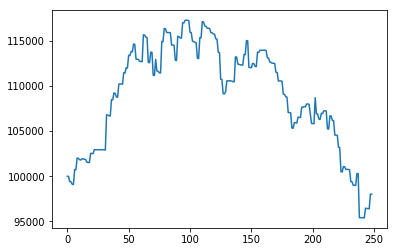

max_draw_down 1st season -0.016870782787790747
sharpe_ratio 1st season 4.531573421587447
annual return 1st season 0.6536479520596274
max_draw_down 1st half year -0.039031491317446106
sharpe_ratio 1st half year 2.327510778318498
annual return 1st half year 0.35935232378640647
stock left 94.64172220755178
max_draw_down -0.18681995453884864
sharpe_ratio -0.16002342788381338
annual return -0.0316369394324193


2021-04-24 16:50:06 DESKTOP-AN08L0P root[65624] INFO model_debug_2_0.5.2: -$1972.88



In [4]:
import logging
import coloredlogs

from trading_bot.utils import show_eval_result, switch_k_backend_device, get_stock_data
from trading_bot.methods import evaluate_model

coloredlogs.install(level='DEBUG')
switch_k_backend_device()

test_data = get_stock_data(test_stock)
initial_offset = test_data[1, 3] - test_data[0, 3]

test_result, history = evaluate_model([], 100000, agent, test_data, window_size, debug)
show_eval_result(model_name, test_result, initial_offset)

2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1095.76 | Position: +$39.49
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1110.29
2021-04-24 16:51:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1114.21 | Position: +$3.59
2021-04-24 16:51:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.79
2021-04-24 16:51:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.14 | Position: -$2.98
2021-04-24 16:51:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.05
2021-04-24 16:51:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1130.70 | Position: +$18.32
2021-04-24 16:51:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1139.10
2021-04-24 16:51:18 DESKTOP-AN0

2021-04-24 16:51:21 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1245.86 | Position: +$24.33
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1264.65
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1254.44 | Position: -$10.59
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1231.80
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1211.31 | Position: -$20.86
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1199.10
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1183.99 | Position: -$15.47
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1177.59
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1175.06 | Position: -$2.88
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1189.99
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1171.60 | Position: -$18.75
2021-04-24 16:51:22 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1182.14
2021-04-24 16:51:22 DES

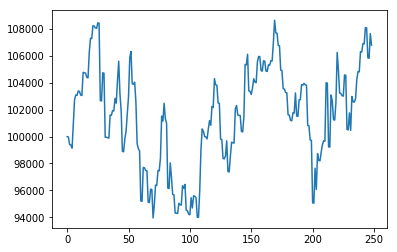

max_draw_down 1st season -0.12222249459995813
sharpe_ratio 1st season -0.7363871370771624
annual return 1st season -0.1862028016842614
max_draw_down 1st half year -0.13385383080683338
sharpe_ratio 1st half year 0.5048982857229755
annual return 1st half year 0.0927420686211331
stock left 104.3199066539577
max_draw_down -0.13385383080683338
sharpe_ratio 0.409899918235011
annual return 0.06864195842079956


2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] INFO model_debug_1: +$6811.80

2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:51:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:51:24 DES

2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.07
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1077.47 | Position: +$9.08
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1100.00
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1135.00 | Position: +$34.67
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1153.04
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1146.95 | Position: -$6.44
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1134.42
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1132.71 | Position: -$2.05
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1140.90
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1148.19 | Position: +$6.95
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1144.23
2021-04-24 16:51:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1183.58 | Position: +$39.01
2021-04-24 16:51:27 DESKTO

2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.63 | Position: +$24.74
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.02
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1049.36 | Position: -$27.98
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1047.97
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1054.58 | Position: +$6.30
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.05
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1068.27 | Position: -$3.10
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1027.42
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1030.45 | Position: +$2.72
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1043.43
2021-04-24 16:51:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1030.10 | Position: -$13.64
2021-04-24 16:51:30 DESKT

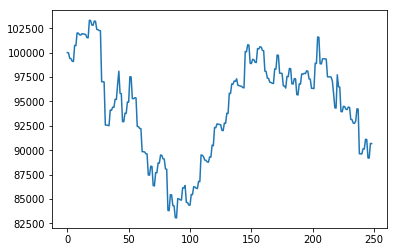

max_draw_down 1st season -0.10756286773801922
sharpe_ratio 1st season -1.5259458233086587
annual return 1st season -0.28896787551423986
max_draw_down 1st half year -0.19606110468986257
sharpe_ratio 1st half year -0.734860437390267
annual return 1st half year -0.15437589827083065
stock left 0
max_draw_down -0.19606110468986257
sharpe_ratio -0.5077457430957663
annual return -0.10513638400753444


2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] INFO model_debug_2: -$10395.22

2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:51:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:51:31 DE

2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.47
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1100.00 | Position: +$22.21
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1135.00
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1153.04 | Position: +$17.70
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1151.02
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1146.95 | Position: -$4.42
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1134.42
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1132.71 | Position: -$2.05
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1140.90
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1148.19 | Position: +$6.95
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1144.23
2021-04-24 16:51:34 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1160.11 | Position: +$15.54
2021-04-24 16:51:34 DESKT

2021-04-24 16:51:36 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1049.51
2021-04-24 16:51:36 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1085.98 | Position: +$36.16
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.49
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1055.73 | Position: -$16.08
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.63 | Position: +$24.74
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.02
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1049.36 | Position: -$27.98
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1047.97
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1054.58 | Position: +$6.30
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.05
2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1068.27 | Position: -$3.10
2021-04-24 16:51:37 DESK

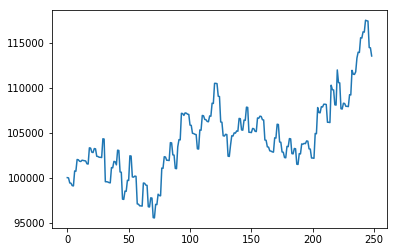

max_draw_down 1st season -0.07150302751875201
sharpe_ratio 1st season -0.638098582814905
annual return 1st season -0.12531561203246444
max_draw_down 1st half year -0.08435599324977064
sharpe_ratio 1st half year 1.2559794098086416
annual return 1st half year 0.23288250358605622
stock left 110.87629264823697
max_draw_down -0.08435599324977064
sharpe_ratio 0.8293878215964281
annual return 0.13663928473197084


2021-04-24 16:51:37 DESKTOP-AN08L0P root[65624] INFO model_debug_3: +$13524.80

2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:51:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:51:38 DE

2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1132.62
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1116.94 | Position: -$16.02
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1126.78
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1129.19 | Position: +$2.07
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1142.11
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1116.28 | Position: -$26.17
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1141.29
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1155.08 | Position: +$13.45
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1167.28
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1167.14 | Position: -$0.49
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1171.46
2021-04-24 16:51:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1201.26 | Position: +$29.45
2021-04-24 16:51:41 DESK

2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1025.65
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1035.46 | Position: +$9.50
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1023.58
2021-04-24 16:51:44 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:51:44 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:51:44 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:51:44 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


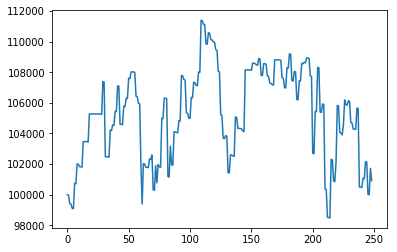

max_draw_down 1st season -0.05598652572097629
sharpe_ratio 1st season 0.5685303886873245
annual return 1st season 0.08533718067509621
max_draw_down 1st half year -0.07983000330329808
sharpe_ratio 1st half year 1.1664780012162757
annual return 1st half year 0.2204721559126348
stock left 98.56054543615448
max_draw_down -0.11591736664651761
sharpe_ratio 0.14310443963650307
annual return 0.008953085356803614


2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] INFO model_debug_4: +$914.87

2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1073.21 | Position: +$16.94
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1091.52
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1095.76 | Position: +$3.91
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1110.29
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1114.21 | Position: +$3.59
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.79
2021-04-24 16:51:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.14 | Position: -$2.98
2021-04-24 16:51:44 DESKT

2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.07
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1077.47 | Position: +$9.08
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1100.00
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1135.00 | Position: +$34.67
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1153.04
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1151.02 | Position: -$2.37
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1146.95
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1134.42 | Position: -$12.87
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1132.71
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1140.90 | Position: +$7.85
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1148.19
2021-04-24 16:51:47 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1144.23 | Position: -$4.30
2021-04-24 16:51:47 DESKTO

2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1103.59
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1083.75 | Position: -$20.17
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1090.58
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1085.98 | Position: -$4.93
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.49
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1055.73 | Position: -$16.08
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1108.24 | Position: +$38.35
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1094.63
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1077.02 | Position: -$17.94
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1049.36
2021-04-24 16:51:50 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1047.97 | Position: -$1.70
2021-04-24 16:51:50 DESK

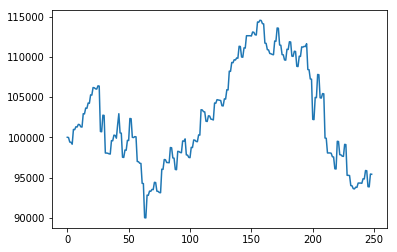

max_draw_down 1st season -0.09068058841602145
sharpe_ratio 1st season -0.5336543629675079
annual return 1st season -0.12965134734982775
max_draw_down 1st half year -0.15431021647355267
sharpe_ratio 1st half year 0.529348384434164
annual return 1st half year 0.09160783939639572
stock left 0
max_draw_down -0.1829740022291525
sharpe_ratio -0.20804439575208986
annual return -0.057867386699499535


2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] INFO model_debug_5: -$5719.86

2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:51:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:51:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1062.39
2021-04-24 16:51:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1084.43 | Position: +$21.72
2021-04-24 16:51:52 DE

2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1142.11
2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1116.28 | Position: -$26.17
2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1141.29
2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1155.08 | Position: +$13.45
2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1167.28
2021-04-24 16:51:54 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1167.14 | Position: -$0.49
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1171.46
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1201.26 | Position: +$29.45
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1204.42
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1196.51 | Position: -$8.27
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1199.10
2021-04-24 16:51:55 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1197.88 | Position: -$1.58
2021-04-24 16:51:55 DESKT

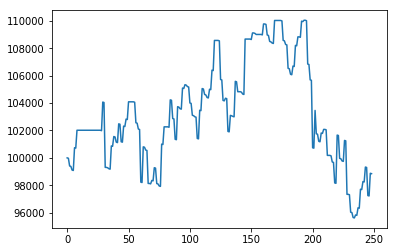

max_draw_down 1st season -0.05626972976326009
sharpe_ratio 1st season -0.40590661767364794
annual return 1st season -0.07219251846184471
max_draw_down 1st half year -0.05925101396388474
sharpe_ratio 1st half year 1.182522589083242
annual return 1st half year 0.18839146961936715
stock left 0
max_draw_down -0.13102878534394224
sharpe_ratio -0.06451299093269691
annual return -0.023433066416759574


2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] INFO model_debug_6: -$2315.74

2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.05
2021-04-24 16:51:58 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1130.65 | Position: +$18.27
2021-04-24 16:51:58 DE

2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1141.29
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1155.08 | Position: +$13.45
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1167.28
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1167.14 | Position: -$0.49
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1171.46
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1201.26 | Position: +$29.45
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1204.42
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1196.51 | Position: -$8.27
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1197.88
2021-04-24 16:52:01 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1211.00 | Position: +$12.76
2021-04-24 16:52:02 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1227.22
2021-04-24 16:52:02 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1232.99 | Position: +$5.40
2021-04-24 16:52:02 DESKT

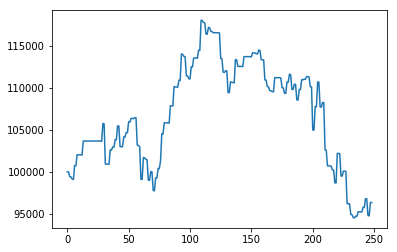

max_draw_down 1st season -0.06914029882363742
sharpe_ratio 1st season -0.13131159790283473
annual return 1st season -0.037373144059834496
max_draw_down 1st half year -0.08202597125360042
sharpe_ratio 1st half year 1.9537172164145817
annual return 1st half year 0.38017814662512417
stock left 0
max_draw_down -0.19979766418027758
sharpe_ratio -0.1912870026352651
annual return -0.04874443791945815


2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] INFO model_debug_7: -$4817.84

2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:04 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:05 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:52:05 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:52:05 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:52:05 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:52:05 DES

2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1084.08
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1068.07 | Position: -$16.34
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.47
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1100.00 | Position: +$22.21
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1135.00
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1153.04 | Position: +$17.70
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1151.02
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1146.95 | Position: -$4.42
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1134.42
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1132.71 | Position: -$2.05
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1140.90
2021-04-24 16:52:07 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1148.19 | Position: +$6.95
2021-04-24 16:52:08 DESKT

2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1083.75
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1034.73 | Position: -$49.35
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1090.58
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1085.98 | Position: -$4.93
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.49
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1055.73 | Position: -$16.08
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.63 | Position: +$24.74
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.02
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1049.36 | Position: -$27.98
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1047.97
2021-04-24 16:52:10 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1054.58 | Position: +$6.30
2021-04-24 16:52:10 DESK

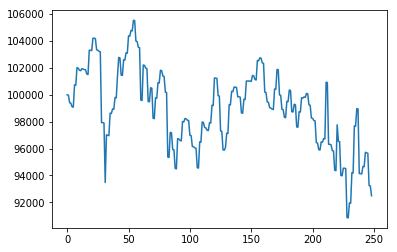

max_draw_down 1st season -0.10298504101743391
sharpe_ratio 1st season 0.02347811328019428
annual return 1st season -0.016462858141951364
max_draw_down 1st half year -0.10469556475095153
sharpe_ratio 1st half year 0.230945543772463
annual return 1st half year 0.0263610831175356
stock left 90.32997490090513
max_draw_down -0.13928429936540293
sharpe_ratio -0.31104667364077687
annual return -0.07627332655855346


2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] INFO model_debug_8: -$7512.31

2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:52:11 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:52:12 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:52:12 DES

2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1134.42
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1132.71 | Position: -$2.05
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1140.90
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1148.19 | Position: +$6.95
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1144.23
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1160.11 | Position: +$15.54
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1159.27
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1183.58 | Position: +$23.96
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1184.07
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1169.44 | Position: -$14.99
2021-04-24 16:52:14 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1169.29
2021-04-24 16:52:15 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1139.28 | Position: -$30.36
2021-04-24 16:52:15 DESK

2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1049.36
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1047.97 | Position: -$1.70
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1054.58
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1071.05 | Position: +$16.15
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.27
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1027.42 | Position: -$41.17
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1043.43
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1030.10 | Position: -$13.64
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.94
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1052.28 | Position: -$3.98
2021-04-24 16:52:17 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1091.79
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.58 | Position: +$2.46
2021-04-24 16:52:18 DESKT

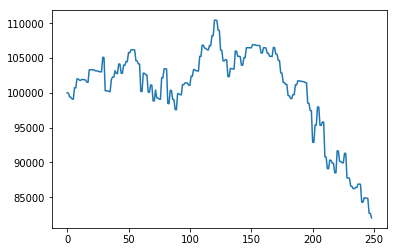

max_draw_down 1st season -0.05626972976326015
sharpe_ratio 1st season 0.13567096558849875
annual return 1st season 0.008972946746652388
max_draw_down 1st half year -0.08116532665189667
sharpe_ratio 1st half year 1.2654337476532163
annual return 1st half year 0.23177763981915622
stock left 80.11022536175295
max_draw_down -0.2574954518626804
sharpe_ratio -1.0027053465155271
annual return -0.18196608756479338


2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] INFO model_debug_9: -$17976.18

2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1114.21 | Position: +$48.04
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.79
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.14 | Position: -$2.98
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.05
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1130.65 | Position: +$18.27
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1130.70
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1139.10 | Position: +$8.06
2021-04-24 16:52:18 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1135.97
2021-04-24 16:52:19 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1143.50 | Position: +$7.19
2021-04-24 16:52:19 DE

2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1051.71
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1025.65 | Position: -$26.38
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1043.41
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1035.46 | Position: -$8.26
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1023.58
2021-04-24 16:52:24 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:52:24 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:52:24 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-24 16:52:24 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


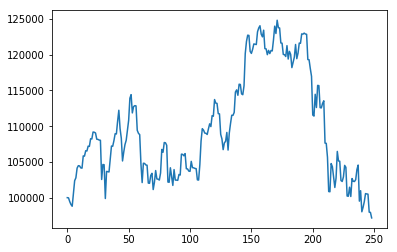

max_draw_down 1st season -0.0852085522238432
sharpe_ratio 1st season 0.8981202254552747
annual return 1st season 0.21552312742020652
max_draw_down 1st half year -0.11603936785675387
sharpe_ratio 1st half year 1.2493520421330948
annual return 1st half year 0.3101591835995674
stock left 94.89973509475612
max_draw_down -0.22181127588497906
sharpe_ratio 0.003108675055323691
annual return -0.02896513111186927


2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] INFO model_debug_10: -$2833.39

2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:52:24 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:52:24 DE

2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1153.04
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1151.02 | Position: -$2.37
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1146.95
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1134.42 | Position: -$12.87
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1132.71
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1140.90 | Position: +$7.85
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1144.23
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1160.11 | Position: +$15.54
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1159.27
2021-04-24 16:52:27 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1183.58 | Position: +$23.96
2021-04-24 16:52:28 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1169.29
2021-04-24 16:52:28 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1139.28 | Position: -$30.36
2021-04-24 16:52:28 DESK

2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1054.58
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1071.05 | Position: +$16.15
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.27
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1027.42 | Position: -$41.17
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1043.43
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1030.10 | Position: -$13.64
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.94
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1052.28 | Position: -$3.98
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1091.79
2021-04-24 16:52:30 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.58 | Position: +$2.46
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1109.65
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1116.36 | Position: +$6.38
2021-04-24 16:52:31 DESKT

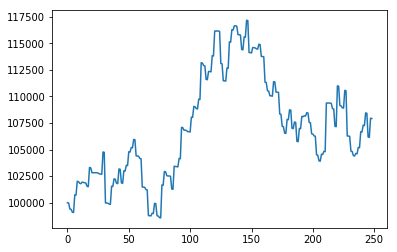

max_draw_down 1st season -0.04700649619592841
sharpe_ratio 1st season 1.2852781833565279
annual return 1st season 0.18558953064260497
max_draw_down 1st half year -0.06968769389469251
sharpe_ratio 1st half year 2.170141095370025
annual return 1st half year 0.369483098242676
stock left 0
max_draw_down -0.11315750094183916
sharpe_ratio 0.49984523182078794
annual return 0.06733286938348315


2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] INFO model_debug_11: +$6650.52

2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1112.05
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1130.65 | Position: +$18.27
2021-04-24 16:52:31 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1143.50
2021-04-24 16:52:32 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1164.16 | Position: +$20.32
2021-04-24 16:52:32 D

2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1177.59
2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1175.06 | Position: -$2.88
2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1189.99
2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1171.60 | Position: -$18.75
2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1182.14
2021-04-24 16:52:35 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1177.98 | Position: -$4.51
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1159.83
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1167.11 | Position: +$6.93
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1174.27
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1191.57 | Position: +$16.95
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1172.12
2021-04-24 16:52:36 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1179.56 | Position: +$7.09
2021-04-24 16:52:36 DESKTO

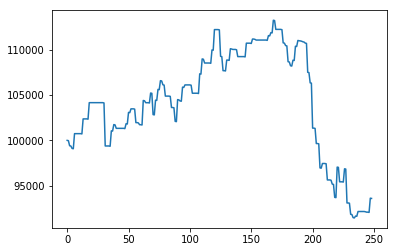

max_draw_down 1st season -0.046054600317301894
sharpe_ratio 1st season 0.6315741480346215
annual return 1st season 0.07446829720711445
max_draw_down 1st half year -0.046054600317301894
sharpe_ratio 1st half year 1.9151547775188744
annual return 1st half year 0.2732957708268642
stock left 0
max_draw_down -0.1921310986732721
sharpe_ratio -0.49468172526053905
annual return -0.07576410918987853


2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] INFO model_debug_12: -$7489.68

2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:52:38 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:52:38 DE

2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.07
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1077.47 | Position: +$9.08
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1100.00
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1135.00 | Position: +$34.67
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1153.04
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1151.02 | Position: -$2.37
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1146.95
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1134.42 | Position: -$12.87
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1132.71
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1140.90 | Position: +$7.85
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1148.19
2021-04-24 16:52:41 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1144.23 | Position: -$4.30
2021-04-24 16:52:41 DESKTO

2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.63 | Position: +$24.74
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.02
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1049.36 | Position: -$27.98
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1047.97
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1054.58 | Position: +$6.30
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1068.27
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1027.42 | Position: -$41.17
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1043.43
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1030.10 | Position: -$13.64
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.94
2021-04-24 16:52:44 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1052.28 | Position: -$3.98
2021-04-24 16:52:44 DESK

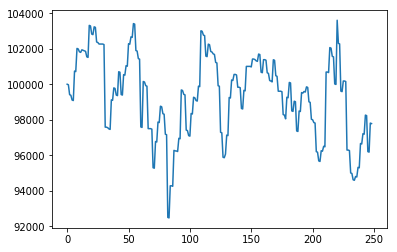

max_draw_down 1st season -0.05670036234264473
sharpe_ratio 1st season -0.5762489392870568
annual return 1st season -0.09715219349833759
max_draw_down 1st half year -0.10582022847333006
sharpe_ratio 1st half year 0.28889538141170196
annual return 1st half year 0.03556507693501931
stock left 0
max_draw_down -0.10582022847333006
sharpe_ratio -0.13166604607517085
annual return -0.03407878813111098


2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] INFO model_debug_13: -$3368.00

2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1095.76
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1110.29 | Position: +$14.20
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1114.21
2021-04-24 16:52:45 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1112.79 | Position: -$1.75
2021-04-24 16:52:45 DE

2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1135.00
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1153.04 | Position: +$17.70
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1151.02
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1146.95 | Position: -$4.42
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1134.42
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1132.71 | Position: -$2.05
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1140.90
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1148.19 | Position: +$6.95
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1144.23
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1160.11 | Position: +$15.54
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1159.27
2021-04-24 16:52:48 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1183.58 | Position: +$23.96
2021-04-24 16:52:48 DESKT

2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1090.58
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1085.98 | Position: -$4.93
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.49
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1055.73 | Position: -$16.08
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1069.57
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1094.63 | Position: +$24.74
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1077.02
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1049.36 | Position: -$27.98
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1047.97
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1054.58 | Position: +$6.30
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1071.05
2021-04-24 16:52:51 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1068.27 | Position: -$3.10
2021-04-24 16:52:51 DESKT

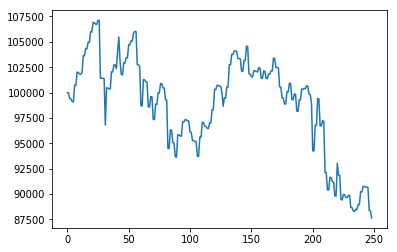

max_draw_down 1st season -0.09642457085378518
sharpe_ratio 1st season -0.13545896780808198
annual return 1st season -0.053407788255377064
max_draw_down 1st half year -0.12595826433823784
sharpe_ratio 1st half year 0.1361402778837534
annual return 1st half year 0.0068998062971765695
stock left 85.60251450170966
max_draw_down -0.18211333554625428
sharpe_ratio -0.6107790545138561
annual return -0.1251837385280481


2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] INFO model_debug_14: -$12352.69

2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG switching to TensorFlow for CPU
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1065.85
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1060.20 | Position: -$5.97
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1055.95
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1053.40 | Position: -$2.87
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1073.21
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1091.52 | Position: +$17.99
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1187.56
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1186.48 | Position: -$1.44
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1062.39
2021-04-24 16:52:52 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1084.43 | Position: +$21.72
2021-04-24 16:52:52 D

2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1167.11
2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1174.27 | Position: +$6.81
2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1191.57
2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1172.12 | Position: -$19.81
2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1179.56
2021-04-24 16:52:56 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1193.89 | Position: +$13.98
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1194.06
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1207.36 | Position: +$12.94
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1207.08
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1208.53 | Position: +$1.09
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Buy at: $1207.64
2021-04-24 16:52:57 DESKTOP-AN08L0P root[65624] DEBUG Sell at: $1211.53 | Position: +$3.53
2021-04-24 16:52:57 DESKT

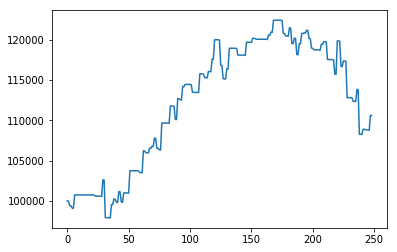

max_draw_down 1st season -0.04605460031730187
sharpe_ratio 1st season 1.126286668883815
annual return 1st season 0.1556778813692299
max_draw_down 1st half year -0.04605460031730187
sharpe_ratio 1st half year 2.899507128673793
annual return 1st half year 0.46601821485762285
stock left 0
max_draw_down -0.11578861662976218
sharpe_ratio 0.7136850839514898
annual return 0.0939586930548546


2021-04-24 16:52:58 DESKTOP-AN08L0P root[65624] INFO model_debug_15: +$9278.98



In [5]:
for i in range(1, 16):
    model_name = 'model_debug_{}'.format(i)
    agent = Agent(window_size, pretrained=True, model_name=model_name)
    coloredlogs.install(level='DEBUG')
    switch_k_backend_device()

    test_data = get_stock_data(test_stock)
    initial_offset = test_data[1, 3] - test_data[0, 3]

    test_result, history = evaluate_model([], 100000, agent, test_data, window_size, debug)
    show_eval_result(model_name, test_result, initial_offset)

### 4. Visualize

In [19]:
def visualize(df, history, title="trading session"):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    # scale = alt.Scale(domain=(min(df['actual']) - 50, max(df['actual']) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='date:T',
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
#     points = alt.Chart(df).transform_filter(
#         alt.datum.action != 'HOLD'
#     ).mark_point(
#         filled=True
#     ).encode(
#         x=alt.X('date:T', axis=alt.Axis(title='Date')),
#         y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
#         color='action'
#     ).interactive(bind_y=False)

    points = alt.Chart(df).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
    ).interactive(bind_y=False)
    

    # merge the two charts
    chart = alt.layer(actual, points, title=title).properties(height=300, width=1000)
    
    return chart

In [20]:
chart = visualize(df, history, title=test_stock)
chart

alt.LayerChart(...)

## GOOG val

In [13]:
import empyrical
df = pd.read_csv('data/small_val_mod2.1.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.1514449796220823
sharpe_ratio 1st season -0.3958425596480901
annual return 1st season -0.14597049540289586
max_draw_down 1st half year -0.15357539829566563
sharpe_ratio 1st half year 0.9051721056140876
annual return 1st half year 0.2353140184708995
max_draw_down -0.22889926098794078
sharpe_ratio -0.12828785592492456
annual return -0.07080377354075174


2021-04-26 11:07:52 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-26 11:07:52 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-26 11:07:52 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-26 11:07:52 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-26 11:07:52 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


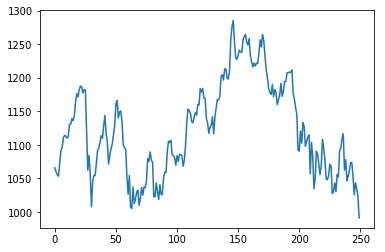

In [14]:
plt.plot(df.actual)

## FB val

In [15]:
df = pd.read_csv('data/small_val2_mod2.1.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.17453001191154388
sharpe_ratio 1st season -1.0871774695269307
annual return 1st season -0.3403904524650665
max_draw_down 1st half year -0.21166295509865862
sharpe_ratio 1st half year 0.9108126505784986
annual return 1st half year 0.2738548616418006
max_draw_down -0.429609195402299
sharpe_ratio -0.2986542160995317
annual return -0.16971480822026952


2021-04-27 22:07:08 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:08 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:08 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:08 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:08 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


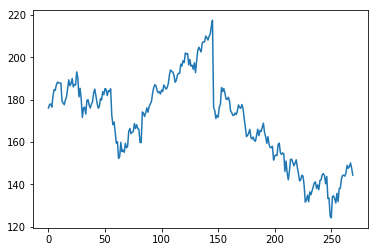

In [16]:
plt.plot(df.actual)

## AMZN val

In [17]:
df = pd.read_csv('data/small_val3_mod2.1.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.07670464335683629
sharpe_ratio 1st season 3.825282876375821
annual return 1st season 1.7370766683275716
max_draw_down 1st half year -0.1416425277935924
sharpe_ratio 1st half year 3.0409183919613656
annual return 1st half year 1.2592727747533097
max_draw_down -0.34103779829468805
sharpe_ratio 1.0444224460978992
annual return 0.3647424005105866


2021-04-27 22:07:15 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:15 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:15 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:15 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:15 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


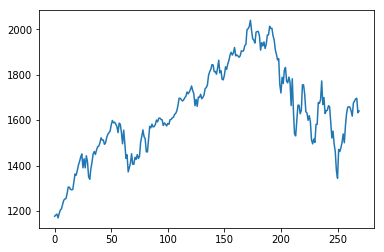

In [18]:
plt.plot(df.actual)

## AAPL

In [19]:
df = pd.read_csv('data/small_val4_mod2.1.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.13449737811000764
sharpe_ratio 1st season -0.44786517534930914
annual return 1st season -0.13148358462063658
max_draw_down 1st half year -0.13449737811000764
sharpe_ratio 1st half year 0.848876597292787
annual return 1st half year 0.19525431496946632
max_draw_down -0.38729693626922884
sharpe_ratio -0.16937937948563983
annual return -0.091737313885212


2021-04-27 22:07:25 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:25 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:26 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:26 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:26 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


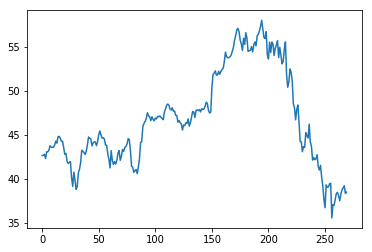

In [20]:
plt.plot(df.actual)

## NETFLIX val

In [21]:
df = pd.read_csv('data/small_val5_mod2.1.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.12340560104009275
sharpe_ratio 1st season 4.786793677634446
annual return 1st season 6.252416347942859
max_draw_down 1st half year -0.1543265749456916
sharpe_ratio 1st half year 4.112317187159931
annual return 1st half year 4.023935428217291
max_draw_down -0.4417738740243933
sharpe_ratio 1.3051236775452404
annual return 0.6574333753351844


2021-04-27 22:07:35 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:35 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:35 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:35 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-27 22:07:35 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


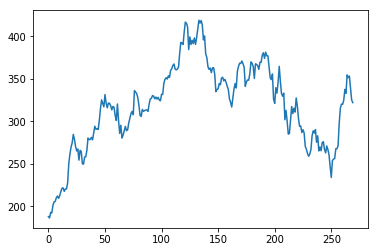

In [22]:
plt.plot(df.actual)

## together train

In [24]:
basic_ret = []
for name in ['GOOG', 'FB', 'AMZN', 'AAPL', 'NFLX']:
    temp = pd.read_csv('data/{}_mod2.1.csv'.format(name))
    basic_ret += list(temp.Close.values[1:] / temp.Close.values[:-1] - 1.0)
basic_ret = np.array(basic_ret)
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down -0.8199042409856543
sharpe_ratio 0.9259435574087055
annual return 0.3095081160184656


## btc gain

In [9]:
df = pd.read_csv('data/btc_big_val_mod2.2.csv')
# filter out the desired features
df = df[['Date', 'Close']]
# rename feature column names
df = df.rename(columns={'Close': 'actual', 'Date': 'date'})
# convert dates from object to DateTime type
dates = df['date']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['date'] = dates
basic_ret = df['actual'].values[1:] / df['actual'].values[:-1] - 1
if len(basic_ret) > 60:
    daily_return_season = basic_ret[:60]
    draw_back = empyrical.max_drawdown(daily_return_season)
    sharpe = empyrical.sharpe_ratio(daily_return_season)
    annual_ret = empyrical.annual_return(daily_return_season)
    print("max_draw_down 1st season {}".format(draw_back))
    print("sharpe_ratio 1st season {}".format(sharpe))
    print("annual return 1st season {}".format(annual_ret))
if len(basic_ret) > 120:
    daily_return_halfy = basic_ret[:120]
    draw_back = empyrical.max_drawdown(daily_return_halfy)
    sharpe = empyrical.sharpe_ratio(daily_return_halfy)
    annual_ret = empyrical.annual_return(daily_return_halfy)
    print("max_draw_down 1st half year {}".format(draw_back))
    print("sharpe_ratio 1st half year {}".format(sharpe))
    print("annual return 1st half year {}".format(annual_ret))
draw_back = empyrical.max_drawdown(basic_ret)
sharpe = empyrical.sharpe_ratio(basic_ret)
annual_ret = empyrical.annual_return(basic_ret)
print("max_draw_down {}".format(draw_back))
print("sharpe_ratio {}".format(sharpe))
print("annual return {}".format(annual_ret))

max_draw_down 1st season -0.14953873762723244
sharpe_ratio 1st season -2.6461083767937823
annual return 1st season -0.40427758033275096
max_draw_down 1st half year -0.17149426576563928
sharpe_ratio 1st half year -0.42870617394820504
annual return 1st half year -0.08878711183712318
max_draw_down -0.17149426576563928
sharpe_ratio 0.6672325857409027
annual return 0.08742697229073548


2021-04-25 12:32:38 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-25 12:32:38 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-25 12:32:38 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-25 12:32:38 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos
2021-04-25 12:32:38 DESKTOP-AN08L0P matplotlib.axes._base[65624] DEBUG update_title_pos


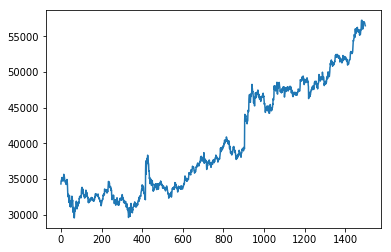

In [12]:
import matplotlib.pyplot as plt
plt.plot(df.actual)

In [21]:
agent.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4480      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 13)                429       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 42        
Total params: 7,031
Trainable params: 7,031
Non-trainable params: 0
_________________________________________________________________


In [30]:
np.max(agent.model.layers[0].weights[0].numpy())

1.4156612

In [31]:
np.max(agent.model.layers[1].weights[0].numpy())

0.90075356

In [32]:
np.max(agent.model.layers[2].weights[0].numpy())

1.3435317

In [33]:
np.max(agent.model.layers[3].weights[0].numpy())

1.5123446

In [34]:
np.min(agent.model.layers[0].weights[0].numpy())

-1.4116632

In [35]:
np.min(agent.model.layers[1].weights[0].numpy())

-1.5872524

In [36]:
np.min(agent.model.layers[2].weights[0].numpy())

-1.4821771

In [37]:
np.min(agent.model.layers[3].weights[0].numpy())

-1.6973114

In [38]:
from keras.models import load_model

In [44]:
load_model('models/model_debug_17_0.5.1').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8960      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2240      
_________________________________________________________________
dense_2 (Dense)              (None, 13)                429       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 42        
Total params: 2,711
Trainable params: 2,711
Non-trainable params: 0
_________________________________________________________________


In [48]:
0.9 ** 10

0.3486784401000001

In [49]:
np.log(0.125) / np.log(0.9)

19.736440436881754

In [58]:
0.9999 ** 5000

0.6065154956247782

In [7]:
1 / (1 + 0.0001 * (11125 / 20) * 10)

0.642570281124498

In [85]:
0.7 ** 5

0.16806999999999994

In [95]:
0.998 ** 3000

0.0024639044511152106